In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

players = pd.read_csv('../../data/raw/MLB_player_stats_2015.csv')
players.columns

players = players[['Team', 'Age', 'GDP', 'IFH', 'BUH', 'GB/FB', 'IFFB%', 'HR/FB', 'IFH%','BUH%', 'Spd', 'EV', 'maxEV', 'Pace (pi)', 'HR']]
players.drop(columns=['Team'], inplace=True)
players.dropna(inplace=True)


In [2]:
X = players[['Age', 'GDP', 'IFH', 'BUH', 'GB/FB', 'IFFB%', 'HR/FB', 'IFH%','BUH%', 'Spd', 'EV', 'maxEV', 'Pace (pi)']]

X.insert(0, 'intercept', 1)

X[:10]

,intercept,Age,GDP,IFH,BUH,GB/FB,IFFB%,HR/FB,IFH%,BUH%,Spd,EV,maxEV,Pace (pi)
0,1,38,1,0,0,5.000000,0.000000,0.333333,0.000000,0.000,0.142857,84.500738,104.322,22.119048
1,1,23,1,0,0,1.000000,0.000000,0.000000,0.000000,0.000,0.142857,76.032501,82.962,20.250000
2,1,34,4,1,0,1.240000,0.020000,0.140000,0.016129,0.000,1.080357,87.681620,108.544,22.139738
3,1,38,19,7,0,1.626168,0.121495,0.084112,0.040230,0.000,1.736382,85.400034,109.962,22.454822
4,1,24,3,3,0,1.054054,0.108108,0.135135,0.076923,0.000,8.036122,90.904075,110.026,20.627706
5,1,25,0,0,0,1.000000,0.000000,0.000000,0.000000,0.000,0.142857,81.064499,82.900,14.500000
6,1,37,2,2,0,7.000000,0.000000,0.000000,0.095238,0.000,2.295635,83.842511,102.349,20.343750
7,1,25,6,9,5,1.181818,0.101010,0.111111,0.076923,0.625,5.994698,88.815779,107.829,24.129870
8,1,33,9,6,0,1.098039,0.058824,0.058824,0.053571,0.000,3.596454,88.347904,105.103,23.774229
10,1,22,0,0,0,5.000000,0.000000,0.000000,0.000000,0.000,0.142857,90.793498,100.726,19.853659


In [3]:
y = players['HR']
y[:10]

0      1
1      0
2      7
3      9
4      5
5      0
6      0
7     11
8      6
10     0
Name: HR, dtype: int64

In [4]:
model = sm.OLS(y, X)
results = model.fit()
#summarize(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          8.04e-165
Time:                        21:49:06   Log-Likelihood:                -2723.0
No. Observations:                 885   AIC:                             5474.
Df Residuals:                     871   BIC:                             5541.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.6582      3.435     -2.812      0.005     -16.400      -2.916
Age            0.0269      0.049      0.554      0.580      -0.068       0.122
GDP            0.6984      0.048     14.505      0.000       0.604       0.793
IFH            0.2318      0.051      4.578      0.000       0.132       0.331
BUH           -0.3713      0.140     -2.648      0.008      -0.647      -0.096
GB/FB         -0.3262      0.089     -3.652      0.000      -0.501      -0.151
IFFB%         -0.3327      1.397     -0.238      0.812      -3.075       2.409
HR/FB         20.3118      1.908     10.648      0.000      16.568      24.056
IFH%          -1.4442      2.156     -0.670      0.503      -5.677       2.788
BUH%           3.2092      0.852      3.768      0.000       1.538       4.881
Spd           -0.1980      0.113     -1.760      0.079      -0.419       0.023
EV            -0.0037      0.045     -0.082      0.935      -0.092       0.085
maxEV          0.1017      0.034      3.031      0.003       0.036       0.168
Pace (pi)     -0.0060      0.082     -0.074      0.941      -0.167       0.155
==============================================================================
Omnibus:                      298.968   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1947.357
Skew:                           1.378   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     2.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
test_players = pd.read_csv('../../data/raw/MLB_player_stats_2016.csv')
test_players.columns

test_players = test_players[['Team', 'Age', 'GDP', 'IFH', 'BUH', 'GB/FB', 'IFFB%', 'HR/FB', 'IFH%','BUH%', 'Spd', 'EV', 'maxEV', 'Pace (pi)', 'HR']]
test_players.drop(columns=['Team'], inplace=True)
test_players.dropna(inplace=True)
test_players.reset_index(drop=True, inplace=True)
test_players[:10]

,Age,GDP,IFH,BUH,GB/FB,IFFB%,HR/FB,IFH%,BUH%,Spd,EV,maxEV,Pace (pi),HR
0,24,1,0,0,1.000000,0.000000,0.000000,0.000000,0.00,0.142857,82.752998,92.340,23.450000,0
1,35,5,3,0,1.137255,0.117647,0.039216,0.051724,0.00,2.147138,86.885544,105.530,22.334489,2
2,39,13,5,1,1.707692,0.046154,0.030769,0.045045,1.00,2.173794,87.549269,106.833,24.127306,2
3,27,0,0,0,0.000000,1.000000,0.000000,0.000000,0.00,0.142857,80.000000,80.000,23.625000,0
4,25,4,5,0,2.275862,0.137931,0.137931,0.075758,0.00,4.351348,88.243172,111.691,22.033382,4
5,24,0,0,0,2.666667,0.000000,0.000000,0.000000,0.00,0.142857,85.161000,107.216,18.387755,0
6,26,7,5,1,1.216495,0.092784,0.082474,0.042373,0.25,2.943869,89.118958,107.612,23.624249,8
7,34,6,10,0,0.902256,0.060150,0.075188,0.083333,0.00,2.806084,86.660456,105.135,22.886002,10
8,24,2,1,0,0.681818,0.000000,0.181818,0.066667,0.00,2.091794,95.134697,115.207,21.344156,4
9,23,0,0,0,5.000000,0.000000,0.000000,0.000000,0.00,1.080357,84.510915,103.930,20.343137,0


In [6]:
test_X = test_players[['Age', 'GDP', 'IFH', 'BUH', 'GB/FB', 'IFFB%', 'HR/FB', 'IFH%','BUH%', 'Spd', 'EV', 'maxEV', 'Pace (pi)']]

test_X.insert(0, 'intercept', 1)

test_y = test_players['HR']

new_prediction = results.get_prediction(test_X)
predicted_y =  pd.DataFrame({'predicted HR': new_prediction.predicted_mean})

In [7]:
test_X[:10]


,intercept,Age,GDP,IFH,BUH,GB/FB,IFFB%,HR/FB,IFH%,BUH%,Spd,EV,maxEV,Pace (pi)
0,1,24,1,0,0,1.000000,0.000000,0.000000,0.000000,0.00,0.142857,82.752998,92.340,23.450000
1,1,35,5,3,0,1.137255,0.117647,0.039216,0.051724,0.00,2.147138,86.885544,105.530,22.334489
2,1,39,13,5,1,1.707692,0.046154,0.030769,0.045045,1.00,2.173794,87.549269,106.833,24.127306
3,1,27,0,0,0,0.000000,1.000000,0.000000,0.000000,0.00,0.142857,80.000000,80.000,23.625000
4,1,25,4,5,0,2.275862,0.137931,0.137931,0.075758,0.00,4.351348,88.243172,111.691,22.033382
5,1,24,0,0,0,2.666667,0.000000,0.000000,0.000000,0.00,0.142857,85.161000,107.216,18.387755
6,1,26,7,5,1,1.216495,0.092784,0.082474,0.042373,0.25,2.943869,89.118958,107.612,23.624249
7,1,34,6,10,0,0.902256,0.060150,0.075188,0.083333,0.00,2.806084,86.660456,105.135,22.886002
8,1,24,2,1,0,0.681818,0.000000,0.181818,0.066667,0.00,2.091794,95.134697,115.207,21.344156
9,1,23,0,0,0,5.000000,0.000000,0.000000,0.000000,0.00,1.080357,84.510915,103.930,20.343137


In [8]:
test_y[:10]

0     0
1     2
2     2
3     0
4     4
5     0
6     8
7    10
8     4
9     0
Name: HR, dtype: int64

In [9]:
predicted_y[:10]

,predicted HR
0,0.276506
1,5.635153
2,14.420896
3,-1.593895
4,6.910823
5,0.569330
6,8.597110
7,8.536711
8,6.814285
9,-0.747902


In [10]:
comparison =  pd.DataFrame({'actual HR': test_y, 'predicted HR': predicted_y['predicted HR']})
comparison[:10]

,actual HR,predicted HR
0,0,0.276506
1,2,5.635153
2,2,14.420896
3,0,-1.593895
4,4,6.910823
5,0,0.569330
6,8,8.597110
7,10,8.536711
8,4,6.814285
9,0,-0.747902


# setting up a model using all numerical statistics and evaluatiing based on techniques found in Introduction to statistical learning.

In [11]:
players = pd.read_csv('../../data/raw/MLB_player_stats_2015.csv')
players.columns

players

,Name,Team,Name.1,Team.1,Season,Age,G,AB,PA,H,...,Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),NameASCII,PlayerId,MLBAMID
0,A.J. Burnett,PIT,A.J. Burnett,PIT,2015,38,26,42,52,5,...,0.476190,0.424581,0.312500,0.816667,0.710526,0.703911,22.119048,A.J. Burnett,512,150359
1,A.J. Cole,WSN,A.J. Cole,WSN,2015,23,3,2,2,0,...,1.000000,0.600000,0.500000,1.000000,0.666667,0.200000,20.250000,A.J. Cole,11467,595918
2,A.J. Ellis,LAD,A.J. Ellis,LAD,2015,34,63,181,217,43,...,0.527619,0.355292,0.615385,0.888087,0.844985,0.566955,22.139738,A.J. Ellis,5677,454560
3,A.J. Pierzynski,ATL,A.J. Pierzynski,ATL,2015,38,113,407,436,122,...,0.740902,0.544818,0.769517,0.923379,0.870180,0.481092,22.454822,A.J. Pierzynski,746,150229
4,Aaron Altherr,PHI,Aaron Altherr,PHI,2015,24,39,137,161,33,...,0.601852,0.412226,0.500000,0.861538,0.768061,0.507837,20.627706,Aaron Altherr,11270,571437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Zach Lee,LAD,Zach Lee,LAD,2015,23,1,2,2,0,...,0.500000,0.400000,NaN,1.000000,1.000000,0.800000,18.666667,Zach Lee,11468,545346
960,Zach Walters,CLE,Zach Walters,CLE,2015,25,12,30,30,4,...,0.709091,0.550847,0.538462,0.717949,0.646154,0.466102,23.965116,Zach Walters,10622,595025
961,Zack Cozart,CIN,Zack Cozart,CIN,2015,29,53,194,214,50,...,0.628788,0.472483,0.728155,0.911647,0.857955,0.531544,22.632495,Zack Cozart,2616,446359
962,Zack Godley,ARI,Zack Godley,ARI,2015,25,9,9,10,1,...,0.521739,0.424242,0.000000,0.583333,0.500000,0.696970,17.954545,Zack Godley,14862,643327


In [12]:
X = players.drop(columns=['Name', 'Team', 'Name.1', 'Team.1', 'Season', 'NameASCII', 'PlayerId', 'MLBAMID', 'HR'])

X

,Age,G,AB,PA,H,1B,2B,3B,R,RBI,...,xwOBA,XBR,O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
0,38,26,42,52,5,4,0,0,1,5,...,0.137,NaN,0.301887,0.476190,0.424581,0.312500,0.816667,0.710526,0.703911,22.119048
1,23,3,2,2,0,0,0,0,0,0,...,0.070,NaN,0.500000,1.000000,0.600000,0.500000,1.000000,0.666667,0.200000,20.250000
2,34,63,181,217,43,27,9,0,24,21,...,0.342,NaN,0.129676,0.527619,0.355292,0.615385,0.888087,0.844985,0.566955,22.139738
3,38,113,407,436,122,88,24,1,38,49,...,0.318,NaN,0.363023,0.740902,0.544818,0.769517,0.923379,0.870180,0.481092,22.454822
4,24,39,137,161,33,13,11,4,25,22,...,0.312,NaN,0.216561,0.601852,0.412226,0.500000,0.861538,0.768061,0.507837,20.627706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,23,1,2,2,0,0,0,0,0,0,...,0.140,NaN,0.000000,0.500000,0.400000,NaN,1.000000,1.000000,0.800000,18.666667
960,25,12,30,30,4,4,0,0,0,3,...,0.141,NaN,0.412698,0.709091,0.550847,0.538462,0.717949,0.646154,0.466102,23.965116
961,29,53,194,214,50,30,10,1,28,28,...,0.295,NaN,0.295129,0.628788,0.472483,0.728155,0.911647,0.857955,0.531544,22.632495
962,25,9,9,10,1,1,0,0,0,0,...,0.021,NaN,0.200000,0.521739,0.424242,0.000000,0.583333,0.500000,0.696970,17.954545


In [13]:
X.dropna(axis=1,inplace=True)

X

,Age,G,AB,PA,H,1B,2B,3B,R,RBI,...,wRC,Bat,WAR,Spd,wRC+,BsR,Def,wSB,Off,Events
0,38,26,42,52,5,4,0,0,1,5,...,-1.766938,-7.717518,-0.076850,0.142857,-27.370685,-0.007843,5.395016,-0.007843,-7.725361,32
1,23,3,2,2,0,0,0,0,0,0,...,-0.275659,-0.510371,-0.025590,0.142857,-100.000000,0.000000,0.207501,0.000000,-0.510371,2
2,34,63,181,217,43,27,9,0,24,21,...,28.341397,4.152935,0.511462,1.080357,116.424439,-2.715686,-3.321893,-0.115685,1.437249,146
3,38,113,407,436,122,88,24,1,38,49,...,55.939390,5.395772,0.930997,1.736382,110.620923,-4.803810,-5.289096,-1.003811,0.591961,373
4,24,39,137,161,33,13,11,4,25,22,...,23.280414,4.568318,1.489093,8.036122,124.351495,1.049130,3.438364,0.349129,5.617447,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,23,1,2,2,0,0,0,0,0,0,...,-0.275659,-0.498594,-0.024340,0.142857,-100.000000,0.000000,0.207501,0.000000,-0.498594,2
960,25,12,30,30,4,4,0,0,0,3,...,-1.319606,-4.869264,-0.452731,0.142857,-40.261260,0.492157,-0.868527,-0.007843,-4.377107,15
961,29,53,194,214,50,30,10,1,28,28,...,26.590001,1.499283,1.264954,4.247985,106.012639,0.535459,3.272181,-0.664541,2.034742,169
962,25,9,9,10,1,1,0,0,0,0,...,-0.596273,-1.819249,-0.050396,0.142857,-56.130388,-0.001961,1.037503,-0.001961,-1.821210,4


In [14]:
X.insert(0, 'intercept', 1)

X

,intercept,Age,G,AB,PA,H,1B,2B,3B,R,...,wRC,Bat,WAR,Spd,wRC+,BsR,Def,wSB,Off,Events
0,1,38,26,42,52,5,4,0,0,1,...,-1.766938,-7.717518,-0.076850,0.142857,-27.370685,-0.007843,5.395016,-0.007843,-7.725361,32
1,1,23,3,2,2,0,0,0,0,0,...,-0.275659,-0.510371,-0.025590,0.142857,-100.000000,0.000000,0.207501,0.000000,-0.510371,2
2,1,34,63,181,217,43,27,9,0,24,...,28.341397,4.152935,0.511462,1.080357,116.424439,-2.715686,-3.321893,-0.115685,1.437249,146
3,1,38,113,407,436,122,88,24,1,38,...,55.939390,5.395772,0.930997,1.736382,110.620923,-4.803810,-5.289096,-1.003811,0.591961,373
4,1,24,39,137,161,33,13,11,4,25,...,23.280414,4.568318,1.489093,8.036122,124.351495,1.049130,3.438364,0.349129,5.617447,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1,23,1,2,2,0,0,0,0,0,...,-0.275659,-0.498594,-0.024340,0.142857,-100.000000,0.000000,0.207501,0.000000,-0.498594,2
960,1,25,12,30,30,4,4,0,0,0,...,-1.319606,-4.869264,-0.452731,0.142857,-40.261260,0.492157,-0.868527,-0.007843,-4.377107,15
961,1,29,53,194,214,50,30,10,1,28,...,26.590001,1.499283,1.264954,4.247985,106.012639,0.535459,3.272181,-0.664541,2.034742,169
962,1,25,9,9,10,1,1,0,0,0,...,-0.596273,-1.819249,-0.050396,0.142857,-56.130388,-0.001961,1.037503,-0.001961,-1.821210,4


In [15]:
y = players['HR']

y

0      1
1      0
2      7
3      9
4      5
      ..
959    0
960    0
961    9
962    0
963    2
Name: HR, Length: 964, dtype: int64

In [16]:
model = sm.OLS(y, X)
results = model.fit()


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.186e+28
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:49:06   Log-Likelihood:                 26781.
No. Observations:                 964   AIC:                        -5.347e+04
Df Residuals:                     919   BIC:                        -5.325e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.309e-14   1.82e-13      0.127      0.899   -3.34e-13    3.81e-13
Age        -2.567e-16   1.96e-15     -0.131      0.896   -4.11e-15    3.59e-15
G          -1.561e-16   5.21e-16     -0.299      0.765   -1.18e-15    8.67e-16
AB         -6.661e-16    3.1e-14     -0.021      0.983   -6.15e-14    6.02e-14
PA          1.282e-06   1.38e-14   9.26e+07      0.000    1.28e-06    1.28e-06
H              1.0000    7.5e-14   1.33e+13      0.000       1.000       1.000
1B            -1.0000    4.3e-14  -2.32e+13      0.000      -1.000      -1.000
2B            -1.0000   2.96e-14  -3.38e+13      0.000      -1.000      -1.000
3B            -1.0000   1.86e-14  -5.37e+13      0.000      -1.000      -1.000
R           8.327e-16   1.94e-15      0.429      0.668   -2.98e-15    4.64e-15
RBI        -2.706e-16   1.72e-15     -0.157      0.875   -3.65e-15    3.11e-15
BB          1.931e-06   1.41e-14   1.36e+08      0.000    1.93e-06    1.93e-06
IBB        -3.221e-06   1.34e-14   -2.4e+08      0.000   -3.22e-06   -3.22e-06
SO          -1.29e-06   1.77e-14  -7.27e+07      0.000   -1.29e-06   -1.29e-06
HBP         1.931e-06   1.46e-14   1.32e+08      0.000    1.93e-06    1.93e-06
SF         -4.441e-16   3.12e-14     -0.014      0.989   -6.17e-14    6.08e-14
SH          6.661e-16   2.91e-14      0.023      0.982   -5.64e-14    5.77e-14
GDP         -2.03e-16   3.36e-15     -0.060      0.952    -6.8e-15     6.4e-15
SB            -0.0003   2.54e-15  -1.29e+11      0.000      -0.000      -0.000
CS             0.0006   6.35e-15   1.01e+11      0.000       0.001       0.001
AVG        -9.326e-15   2.85e-13     -0.033      0.974   -5.69e-13     5.5e-13
IFH        -4.441e-16   3.06e-15     -0.145      0.884   -6.44e-15    5.55e-15
BUH        -1.388e-15   7.17e-15     -0.193      0.847   -1.55e-14    1.27e-14
BB%         3.553e-15   3.08e-13      0.012      0.991   -6.02e-13    6.09e-13
K%          6.606e-15   5.04e-14      0.131      0.896   -9.23e-14    1.06e-13
BB/K        1.177e-14   4.38e-14      0.268      0.788   -7.43e-14    9.78e-14
OBP        -2.487e-14   5.07e-13     -0.049      0.961   -1.02e-12    9.69e-13
SLG         8.882e-16   1.57e-13      0.006      0.995   -3.07e-13    3.09e-13
OPS         -1.51e-14   3.93e-13     -0.038      0.969   -7.87e-13    7.57e-13
ISO         1.088e-14   1.56e-13      0.070      0.944   -2.95e-13    3.17e-13
BABIP       5.801e-15   1.14e-13      0.051      0.959   -2.18e-13     2.3e-13
GB/FB      -1.065e-15   4.28e-15     -0.249      0.804   -9.47e-15    7.34e-15
LD%        -9.631e-15   6.06e-14     -0.159      0.874   -1.29e-13    1.09e-13
GB%         1.221e-15   4.53e-14      0.027      0.978   -8.77e-14    9.01e-14
FB%        -3.331e-15   5.89e-14     -0.057      0.955   -1.19e-13    1.12e-13
IFFB%      -4.441e-15    5.9e-14     -0.075      0.940    -1.2e-13    1.11e-13
HR

In [17]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])

vif

C:\Users\nick_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif
Age,1.218924e+00
G,1.455363e+01
AB,7.997203e+05
PA,inf
H,3.543290e+05
1B,inf
2B,2.262021e+03
3B,2.528630e+01
R,6.109780e+01
RBI,4.664111e+01


# Training multiple linear Regression Model with final dataset 


In [18]:
players_df = pd.read_csv('../../data/processed/nicks_dataset.csv')

# players_df['Age'] = players_df['Age']/50

# players_df.head



In [19]:
players_df['Age'] = players_df['Age'] - players_df['Age'].mean()

players_df = players_df.dropna().reset_index(drop=True)
players_df.head

<bound method NDFrame.head of       season_factor  tmFactor      Age    G   AB   PA    H  1B  2B  3B  ...  \
0          0.827922  0.727273  0.14054   64  171  196   37  27   8   0  ...   
1          0.827922  0.482213  0.22054   81  247  259   54  37  15   0  ...   
2          0.827922  0.636364 -0.05946   57  198  227   40  30   6   0  ...   
3          0.827922  0.723320 -0.03946  123  327  361   71  49  13   1  ...   
4          0.827922  0.784470  0.12054  125  378  429   99  75  14   0  ...   
...             ...       ...      ...  ...  ...  ...  ...  ..  ..  ..  ...   
4711       0.804752  0.801688 -0.07946   19   62   65   15  11   2   0  ...   
4712       0.804752  0.683544  0.02054  118  297  325   64  41  14   5  ...   
4713       0.804752  0.696203 -0.09946  155  542  602  135  77  34   1  ...   
4714       0.804752  0.827004 -0.07946  138  497  547  105  66  20   2  ...   
4715       0.804752  0.888905  0.02054   42   70   88    9   6   3   0  ...   

      xwOBA       XBR

## split data between training and test data, as well as predictors and dependent

In [20]:
# 
# 
training_df = players_df[players_df['Season'] != 2024].reset_index(drop=True)
testing_df = players_df[players_df['Season'] == 2024].reset_index(drop=True)
# training_df.head
#testing_df.head
#training_df.reset_index()
#testing_df.reset_index()

KeyError: 'Season'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# preparing the training/testing splits
X_train = training_df.drop(columns=['HR', 'Season'])
y_train = training_df['HR']

X_test = testing_df.drop(columns=['HR', 'Season'])
y_test = testing_df['HR']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 26.932720933895308


In [ ]:
import numpy as np

# MSE is already computed, so we take its square root to get RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 5.189674453556341


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 3.8370438685299777


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² (R-squared):", r2)


R² (R-squared): 0.6908210694992112


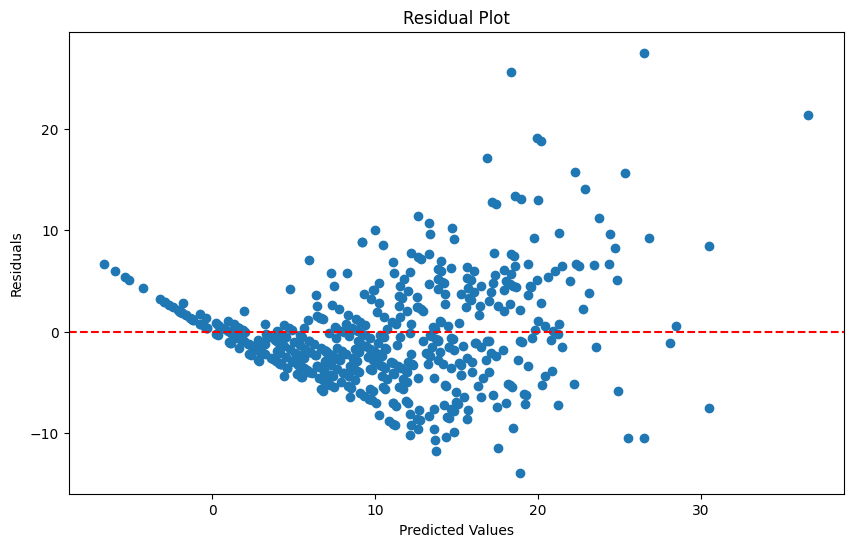

In [ ]:
import matplotlib.pyplot as plt

# Residuals (actual - predicted values)
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


## multivariable linear regression model fitted using OLS function from statsmodel.api

In [ ]:
X_train.insert(0, 'intercept', 1)
X_test.insert(0, 'intercept', 1)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(5045, 16)
(543, 16)


,intercept,Age,GDP,IFH,BUH,GB/FB,IFFB%,HR/FB,IFH%,BUH%,Spd,EV,maxEV,Pace (pi),season_factor,tmFactor
0,1,0.10027,1,0,0,5.000000,0.000000,0.333333,0.000000,0.0,0.142857,84.500738,104.322,22.119048,0.724469,0.603448
1,1,0.06027,4,1,0,1.240000,0.020000,0.140000,0.016129,0.0,1.080357,87.681620,108.544,22.139738,0.724469,0.806034
2,1,0.10027,19,7,0,1.626168,0.121495,0.084112,0.040230,0.0,1.736382,85.400034,109.962,22.454822,0.724469,0.431034
3,1,-0.03973,3,3,0,1.054054,0.108108,0.135135,0.076923,0.0,8.036122,90.904075,110.026,20.627706,0.724469,0.560345
4,1,0.09027,2,2,0,7.000000,0.000000,0.000000,0.095238,0.0,2.295635,83.842511,102.349,20.343750,0.724469,0.560345


In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

sm_model = sm.OLS(y_train, X_train).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     701.7
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:02:19   Log-Likelihood:                -15800.
No. Observations:                5045   AIC:                         3.163e+04
Df Residuals:                    5029   BIC:                         3.174e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept       -53.5861      3.677    -14.573      0.000     -60.795     -46.377
Age               3.3024      2.188      1.509      0.131      -0.987       7.592
GDP               0.5690      0.022     25.890      0.000       0.526       0.612
IFH               0.4819      0.024     20.236      0.000       0.435       0.529
BUH              -0.1376      0.067     -2.058      0.040      -0.269      -0.007
GB/FB            -0.2657      0.057     -4.655      0.000      -0.378      -0.154
IFFB%             6.5301      1.146      5.697      0.000       4.283       8.777
HR/FB            47.9155      1.302     36.796      0.000      45.363      50.468
IFH%            -21.4700      2.263     -9.489      0.000     -25.906     -17.034
BUH%              1.8178      0.341      5.329      0.000       1.149       2.487
Spd              -0.0230      0.046     -0.495      0.620      -0.114       0.068
EV                0.2815      0.042      6.691      0.000       0.199       0.364
maxEV             0.2009      0.032      6.319      0.000       0.139       0.263
Pace (pi)        -0.1131      0.042     -2.665      0.008      -0.196      -0.030
season_factor     3.9978      0.512      7.815      0.000       2.995       5.001
tmFactor          7.2179      0.616     11.723      0.000       6.011       8.425
==============================================================================
Omnibus:                      730.293   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1754.853
Skew:                           0.827   Prob(JB):                         0.00
Kurtosis:                       5.369   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_test_predictions = sm_model.predict(X_test)

r2 = r2_score(y_test, y_test_predictions)

print(f"R squared: {r2}")

R squared: 0.6908210694992085
